In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("C:/Users/piyus/Data_Science/Lecture_30&31/train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Analysing Missing Data

In [4]:
train_df.isnull().sum()
#used to check inconsistency in data
#here we can see 177 values from age is missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

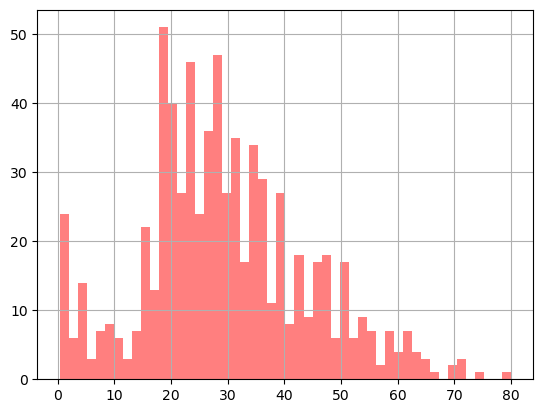

In [5]:
ax = train_df["Age"].hist(bins = 50,color = 'red' , alpha = 0.5)
#alpha means translucency

<Axes: ylabel='Density'>

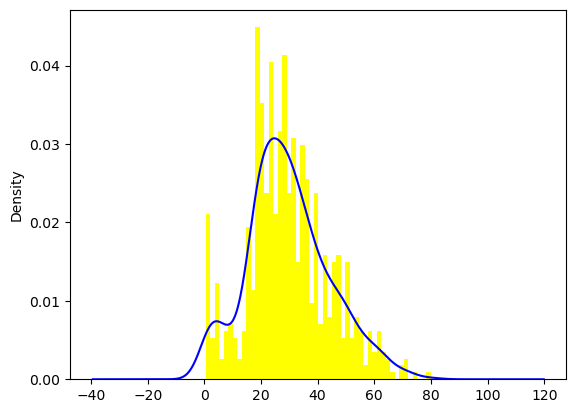

In [6]:
ax = train_df["Age"].hist(bins = 50,density = True ,color = 'yellow')
train_df["Age"].plot( kind = 'density' , color = 'blue')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

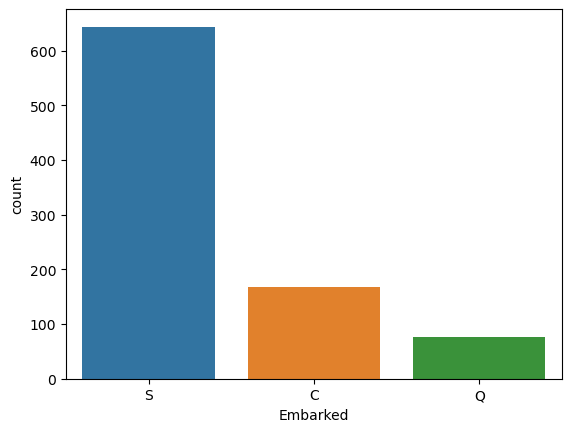

In [7]:
print(train_df['Embarked'].value_counts())
sns.countplot(x = 'Embarked' , data = train_df)

In [8]:
train_data = train_df.copy()

# Handling Missing Data

In [9]:
train_data['Age'].fillna(train_df['Age'].median(),inplace = True)
#inplace is used to do changes on the same address , if not given true then it creates a copy nd then do the changes

In [10]:
train_df.Embarked.value_counts().idxmax()

'S'

In [11]:
train_data['Embarked'].fillna(train_df.Embarked.value_counts().idxmax() ,inplace = True)
train_data.drop('Cabin' ,axis = 1, inplace = True)
#we dropped Cabin coz only about 20 percent of data was available and we cant recreate the remaining data from this given data

In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis and Visualization

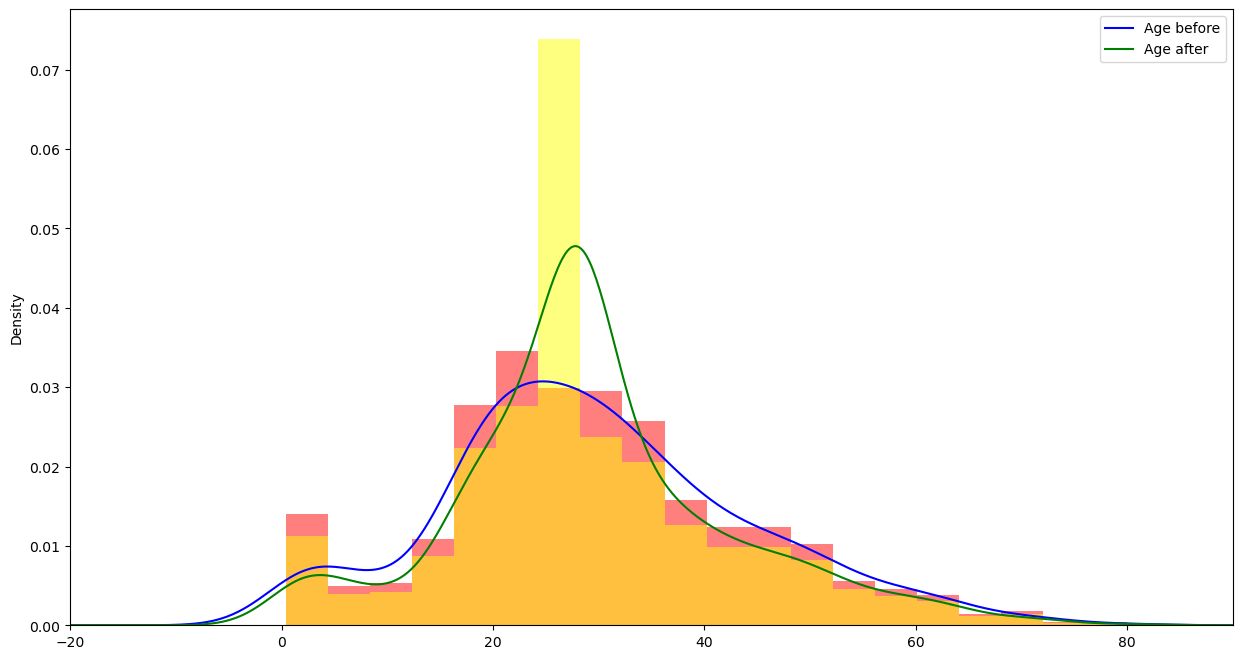

In [13]:
plt.figure(figsize = (15,8)) #used to define the size of graph
ax = train_df["Age"].hist(bins = 20,density = True ,color = 'red' , alpha = 0.5)
train_df["Age"].plot( kind = 'density' , color = 'blue')
ax = train_data["Age"].hist(bins = 20,density = True ,color = 'yellow' , alpha = 0.5)
train_data["Age"].plot( kind = 'density' , color = 'green')
plt.xlim(-20,90)
ax.legend(['Age before' , 'Age after'])

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [15]:
train_data = pd.get_dummies(train_data , columns = ['Sex' , 'Embarked'])
#get dummies jo bhi columns do unko unique values pr tod deta h

In [16]:
train_data.drop('PassengerId' , axis = 1,inplace = True)
train_data.drop('Name' , axis = 1,inplace = True)
train_data.drop('Ticket' , axis = 1,inplace = True)

In [17]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [18]:
train_data['Sex_female'] = np.where(train_data['Sex_female'] == True , 1,0)
train_data['Sex_male'] = np.where(train_data['Sex_male'] == True , 1,0)
train_data['Embarked_C'] = np.where(train_data['Embarked_C'] == True , 1,0)
train_data['Embarked_Q'] = np.where(train_data['Embarked_Q'] == True , 1,0)
train_data['Embarked_S'] = np.where(train_data['Embarked_S'] == True , 1,0)

In [19]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


C:\Users\piyus\AppData\Local\Temp\ipykernel_18172\1480627480.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1] , color = 'green' , shade = True)  #kdeplot is used for continous plot
C:\Users\piyus\AppData\Local\Temp\ipykernel_18172\1480627480.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Age'][train_data.Survived == 0] , color = 'red' , shade = True)


(-10.0, 90.0)

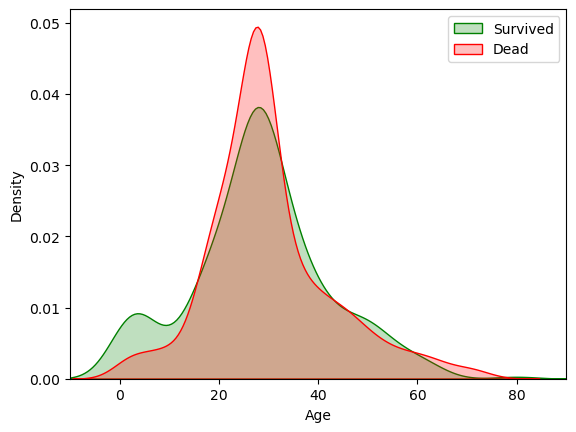

In [20]:
ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1] , color = 'green' , shade = True)  #kdeplot is used for continous plot
ax = sns.kdeplot(train_data['Age'][train_data.Survived == 0] , color = 'red' , shade = True)
plt.legend(['Survived' , 'Dead'])
plt.xlim(-10,90)

C:\Users\piyus\AppData\Local\Temp\ipykernel_18172\3054391296.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1] , color = 'green' , shade = True)  #kdeplot is used for continous plot
C:\Users\piyus\AppData\Local\Temp\ipykernel_18172\3054391296.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 0] , color = 'red' , shade = True)


(-100.0, 200.0)

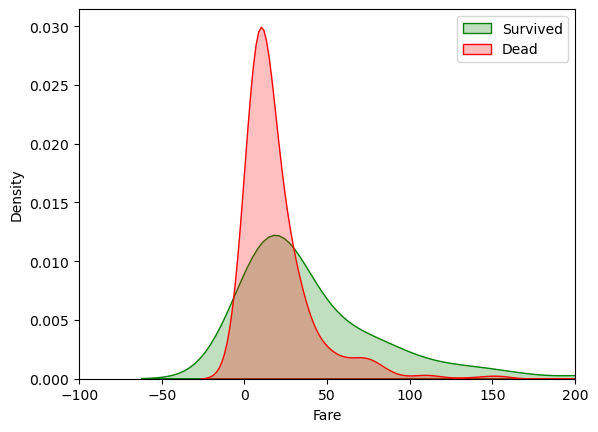

In [21]:
ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1] , color = 'green' , shade = True)  #kdeplot is used for continous plot
ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 0] , color = 'red' , shade = True)
plt.legend(['Survived' , 'Dead'])
plt.xlim(-100,200)

<Axes: xlabel='Pclass', ylabel='Survived'>

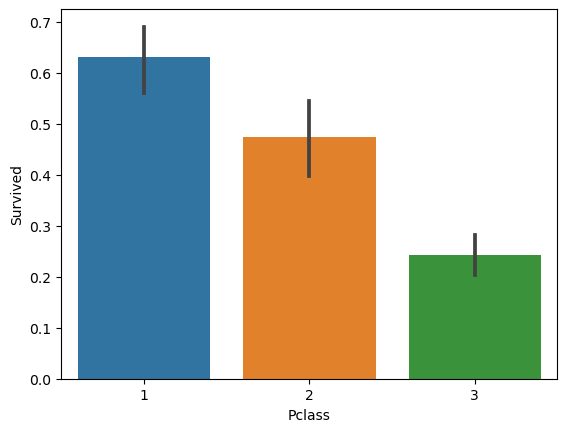

In [22]:
sns.barplot(x = 'Pclass' , y = 'Survived' , data= train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

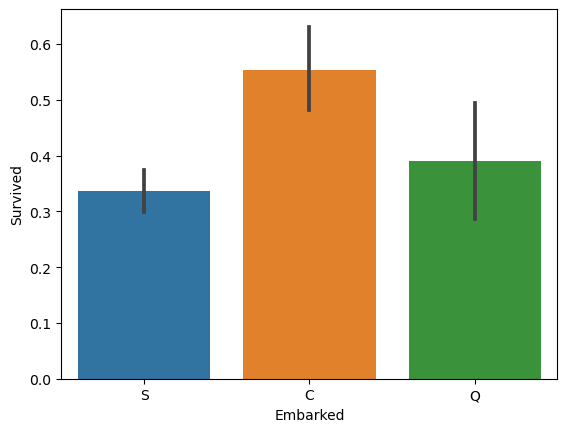

In [23]:
sns.barplot(x = 'Embarked' , y = 'Survived' , data= train_df)

<Axes: xlabel='SibSp', ylabel='Survived'>

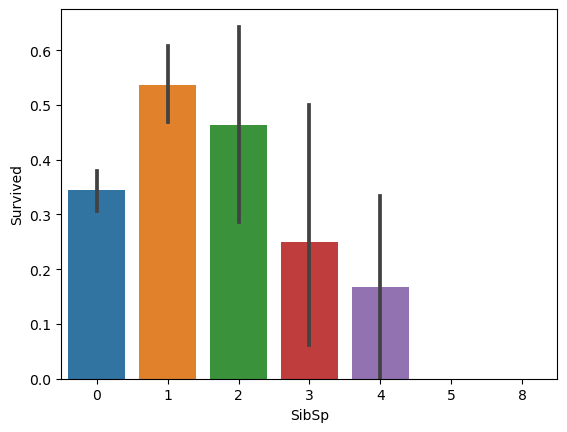

In [24]:
sns.barplot(x = 'SibSp' , y = 'Survived' , data= train_df)

<Axes: xlabel='Parch', ylabel='Survived'>

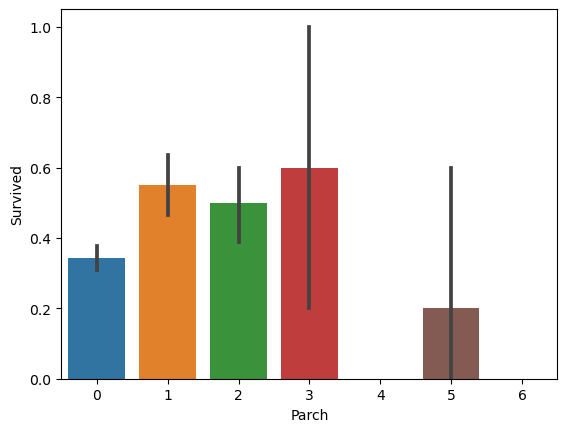

In [25]:
sns.barplot(x = 'Parch' , y = 'Survived' , data= train_df)

<Axes: xlabel='Sex', ylabel='Survived'>

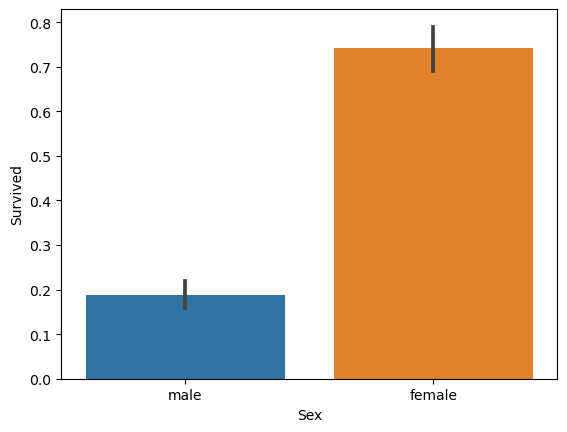

In [26]:
sns.barplot(x = 'Sex' , y = 'Survived' , data= train_df)

In [27]:
train_data['Travel_Alone'] = np.where((train_data['SibSp'] + train_data['Parch']) >0 ,0 , 1)

In [28]:
train_data.drop('SibSp' , axis = 1, inplace = True)
train_data.drop('Parch' , axis = 1, inplace = True)

<Axes: xlabel='Travel_Alone', ylabel='Survived'>

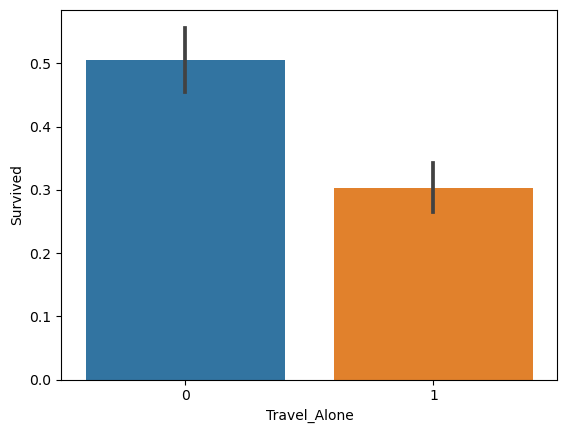

In [29]:
sns.barplot(x = 'Travel_Alone' , y = 'Survived' , data= train_data)

<Axes: >

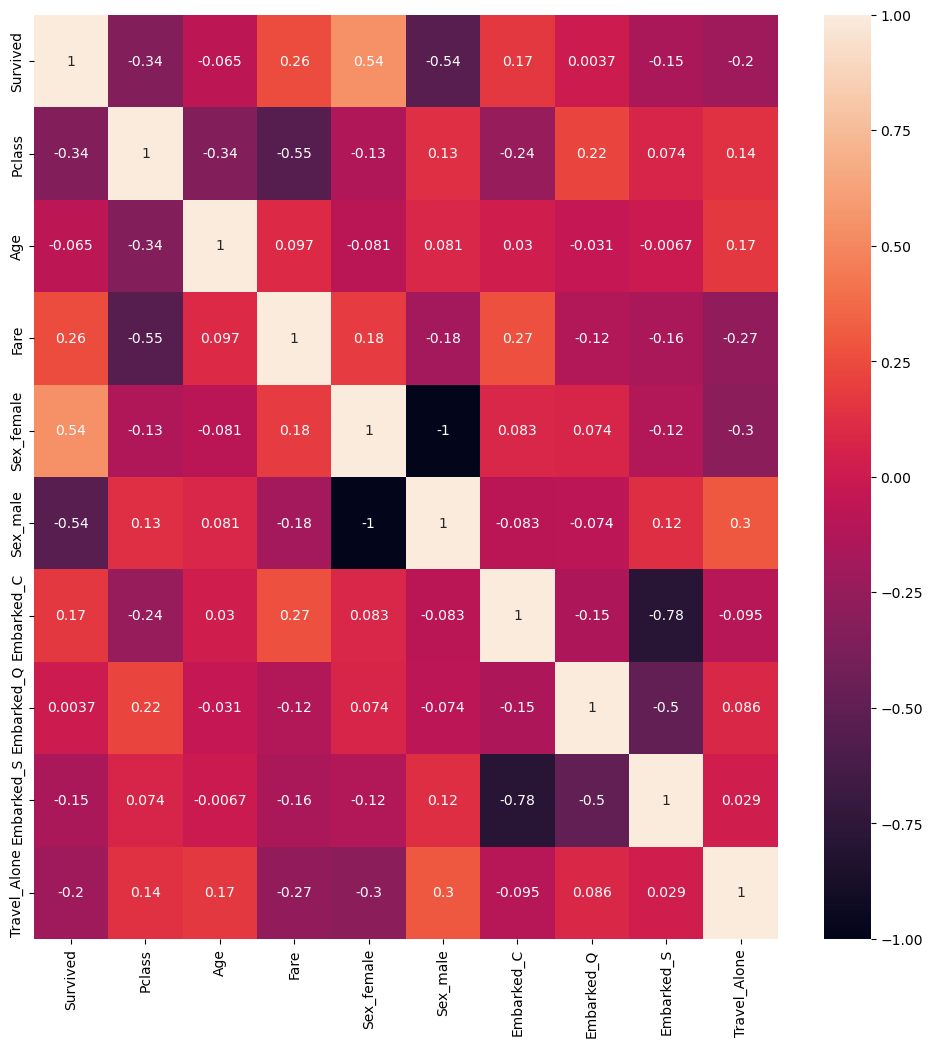

In [30]:
plt.figure(figsize = (12,12))
sns.heatmap(train_data.corr() ,annot=True)

In [31]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Travel_Alone
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,1
887,1,1,19.0,30.0000,1,0,0,0,1,1
888,0,3,28.0,23.4500,1,0,0,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,1


# Model Training

In [32]:
cols_model = [ 'Pclass', 'Age' ,'Fare' , 'Sex_female' , 'Sex_male' , 'Embarked_C' , 'Embarked_Q' , 'Embarked_S' , 'Travel_Alone']
train_X = train_data[cols_model]
train_Y = train_data["Survived"]

In [33]:
print(type(train_X) , type(train_Y))
train_X = train_X.values
train_Y = train_Y.values
print(type(train_X) , type(train_Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [34]:
split = 0.9
X_train = train_X[:int(split*train_X.shape[0]),:]
Y_train = train_Y[:int(split*train_Y.shape[0])]
X_test = train_X[int(split*train_X.shape[0]):,:]
Y_test = train_Y[int(split*train_Y.shape[0]):]

In [35]:
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(801, 9) (801,) (90, 9) (90,)


In [36]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))

In [37]:
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(801, 10) (801,) (90, 10) (90,)


In [38]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [39]:
def hypothesis(X,weights):
    return sigmoid(np.dot(X,weights))

In [40]:
def loss(X,Y,weights):
    pred = hypothesis(X,weights)
    loss = np.mean(Y* np.log(pred) + (1-Y)*np.log(1-pred))
    return -1*loss

In [41]:
def gradient(X,Y,weights):
    pred = hypothesis(X,weights)
    grad = np.dot(X.T,(Y-pred))
    return grad/X.shape[0]

In [42]:
def gradient_descent(X,Y):
    weights = np.zeros((X.shape[1],))
    epochs = 100000
    lr_rate = 0.003
    list_loss = []
    
    for i in range(epochs):
        grad = gradient(X,Y,weights)
        list_loss.append(loss(X,Y,weights))
        weights = weights + (lr_rate*grad)
    return weights,list_loss

In [43]:
weights , list_loss = gradient_descent(X_train,Y_train)

# Loss Visualization

In [44]:
list_loss[-1]

0.450063935996833

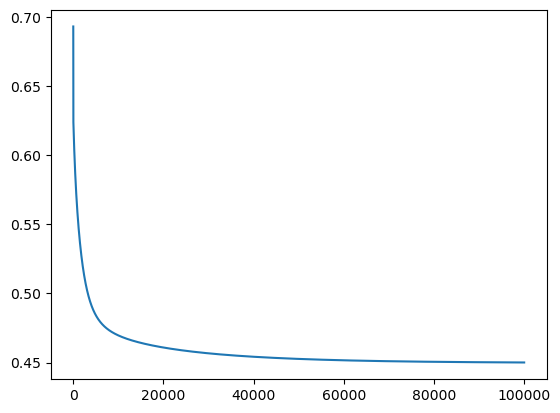

In [45]:
plt.plot(list_loss)

In [46]:
weights

array([ 1.64674796e+00, -1.04845818e+00, -2.86858506e-02,  7.94682108e-04,
        2.14187844e+00, -4.95130484e-01,  7.17785540e-01,  6.10701638e-01,
        3.18260778e-01,  1.53384121e-01])

# Model Testing

In [47]:
pred = []

for i in range(X_test.shape[0]):
    y_hat = hypothesis(X_test[i],weights)
    print(y_hat , Y_test[i])
    if (y_hat > 0.5):
        pred.append(1)
    else:
        pred.append(0)

0.7579677484332348 1
0.5501402960657976 1
0.21733726293541258 1
0.09186380770618424 1
0.08277741724608345 0
0.3672705887576446 0
0.6467377305410952 0
0.1705023357834726 0
0.8960413690112959 1
0.09434704478022536 0
0.06775680815772327 0
0.18704681370741227 0
0.6930146711162395 0
0.08388973903760052 0
0.443147029571983 0
0.6133509961912419 0
0.25211419811106084 0
0.06005965750578257 0
0.12562773505861616 0
0.8376801450000262 1
0.0919757438502229 1
0.3739617073281803 0
0.5490686391441004 1
0.15429176363316963 0
0.11636090678043201 0
0.0927576205126222 0
0.4435436224131058 1
0.11642629076178264 1
0.817106428026063 1
0.7195511238070155 1
0.3461632816243199 1
0.12785640228918885 0
0.10195898260026563 0
0.11589803345221146 0
0.9172298035046704 1
0.10739494516065855 0
0.0895681877021082 0
0.08354227189595254 1
0.5485285502272974 1
0.11011849234524514 0
0.2840859187490158 0
0.9413317814525227 1
0.10840541480866348 0
0.11890006556963813 0
0.06175025582925401 0
0.08140340453914724 0
0.10713769213

In [48]:
for i in range(Y_test.shape[0]):
    print(pred[i] , '  ' , Y_test[i])

1    1
1    1
0    1
0    1
0    0
0    0
1    0
0    0
1    1
0    0
0    0
0    0
1    0
0    0
0    0
1    0
0    0
0    0
0    0
1    1
0    1
0    0
1    1
0    0
0    0
0    0
0    1
0    1
1    1
1    1
0    1
0    0
0    0
0    0
1    1
0    0
0    0
0    1
1    1
0    0
0    0
1    1
0    0
0    0
0    0
0    0
0    0
0    0
1    1
0    0
0    0
1    0
1    1
1    0
1    1
1    1
0    1
1    1
0    0
0    0
0    0
1    1
1    0
0    0
1    1
1    1
0    0
0    0
0    1
0    0
1    1
0    0
0    0
1    1
1    1
0    0
0    0
0    0
1    1
1    1
0    0
1    0
0    0
0    0
1    0
0    0
1    1
1    0
1    1
0    0


# Calculating Accuracy

In [49]:
correct = 0
for i in range(Y_test.shape[0]):
    if(pred[i] == Y_test[i]):
        correct += 1
print(correct/Y_test.shape[0])

0.8
